
# Анализ данных интернет-магазина

В данном проекте проводится анализ данных интернет-магазина для выявления ключевых закономерностей в продажах.  
**Цели проекта:**  
1. Провести общий осмотр данных.  
2. Очистить и подготовить данные для анализа.  
3. Рассчитать ключевые метрики.  
4. Сформулировать выводы, которые помогут бизнесу принимать решения.  

**Данные:**  
- Набор данных включает информацию о продажах в интернет-магазине.  
- Основные столбцы: номер заказа, код товара, дата покупки, уникальный ID покупателя, страна, описание товара и его стоимость.  


Ссылка на данные: https://www.kaggle.com/datasets/carrie1/ecommerce-data/data

# 1. Импорт данных

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

Подгрузка файла в такой кодировке необходима ввиду особенностей данных

# 2. Очистка данных

Получим обзорную информацию о наборе данных

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


В колонке 'CustomerID', соответсвующей уникальному ID пользователя содержится много пропущенных значений.

Далее, для расчета метрик мы будем использовать данные только от авторизованных пользователей

Удалим их и приведем тип данных к целочисленному формату

## Обработка пропусков, дубликатов и невалидных значений

In [10]:
df = df.dropna()

In [11]:
df['CustomerID'] = df['CustomerID'].astype(int)

Также преобразуем тип колонки, содержащей дату

In [12]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [13]:
df = df.drop_duplicates()

Проверим, есть ли невалидные данные в колонке стран

In [14]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

Удалим данные о заказах, соответсвующих неиивестным странам

In [15]:
df = df[df['Country'] != 'Unspecified']

Рассмотрим подробнее колонки с численными значениями

In [16]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401363.000000,401363,401363.000000,401363.000000
mean,12.186141,2011-07-10 12:12:10.008247040,3.474216,15282.090008
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 14:39:00,1.250000,13941.000000
50%,5.000000,2011-07-29 17:28:00,1.950000,15146.000000
75%,12.000000,2011-10-20 12:03:00,3.750000,16788.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.358045,NaN,69.784928,1713.697476


В глаза бросается отрицательное число, соответсвующее графе количества товара, а также нулевая цена товаров

Удалим записи о товарах с нулевой стоимостью

In [17]:
df = df[df['UnitPrice'] != 0.0]

## Обработка аномалий

Рассмотрим боксплот графы количества товаров

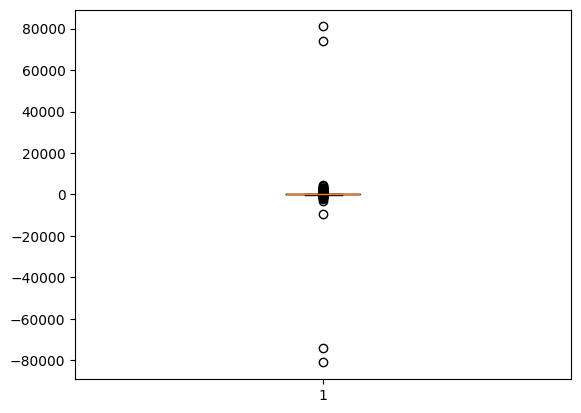

In [18]:
plt.boxplot(df['Quantity'])
plt.show()

Легко заметить, что точки, соответсвующие аномально большому количеству заказов зеркалятся.
Это может говорить о ошибке в данных.
Удалим эти записи

In [19]:
df = df[df['Quantity'].abs() < 20000]

## Обработка данных об отказах

Посмотрим, на выборку данных с отрицательным количеством товаров

In [20]:
df[df['Quantity'] < 0].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173079,C551648,22941,CHRISTMAS LIGHTS 10 REINDEER,-10,2011-05-03 12:02:00,8.50,14800,United Kingdom
479426,C577159,20931,BLUE POT PLANT CANDLE,-11,2011-11-18 09:58:00,2.95,15406,United Kingdom
385939,C570221,22384,LUNCH BAG PINK POLKADOT,-7,2011-10-09 12:56:00,1.65,13113,United Kingdom
388635,C570447,22728,ALARM CLOCK BAKELIKE PINK,-3,2011-10-10 14:50:00,3.75,16791,United Kingdom
424157,C573219,22244,3 HOOK HANGER MAGIC GARDEN,-2,2011-10-28 11:49:00,1.95,14415,United Kingdom
497457,C578371,21714,CITRONELLA CANDLE GARDEN POT,-5,2011-11-24 11:16:00,1.25,14410,United Kingdom
274334,C560898,22797,CHEST OF DRAWERS GINGHAM HEART,-2,2011-07-21 17:30:00,16.95,12722,France
71508,C542138,51014L,"FEATHER PEN,LIGHT PINK",-72,2011-01-25 17:21:00,0.85,17368,United Kingdom
383082,C569996,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,-12,2011-10-06 20:38:00,1.45,15322,United Kingdom
47473,C540417,22386,JUMBO BAG PINK POLKADOT,-20,2011-01-07 10:56:00,1.95,13680,United Kingdom


Как видно заказы с отрицательным количеством товаров имеют префиксом в номере заказа "C", что соответсует отмененным заказам.
Выделим их в отдельную таблицу, они пригодятся в дальнейшем, при подсчете процента отказов.

In [21]:
returns = df[df['InvoiceNo'].str.startswith('C')]

In [22]:
df = df[df['InvoiceNo'].str.startswith('C') == False]

Обработаем отказы следующим образом:
Отнимем от количества заказов число, равное количеству единиц возвращенного товара. 

Следует учитывать случаи когда заказы могли прийти к покупателю несколькими партиями, а возврат оформлялся одной партией.
Это преобразование необходимо для того, чтобы возвращенные товары не оказывали влияния на рассчитываемые метрики 

In [23]:
def filter_valid_orders(df, returns):
    """
    Фильтрует заказы с учетом возвратов, используя предварительно подготовленные датафреймы
    
    Параметры:
    df (pd.DataFrame): Датафрейм с заказами (без возвратов)
    returns (pd.DataFrame): Датафрейм с возвратами
    
    Возвращаемое:
    pd.DataFrame: Отфильтрованный датафрейм только теми товарами, которые остались у клиентов
    """
    from collections import defaultdict
    
    # Создаем словарь заказов
    orders_dict = defaultdict(list)
    for _, row in df.iterrows():
        key = (row['StockCode'], row['CustomerID'])
        orders_dict[key].append((row['InvoiceDate'], _, row['Quantity']))
    
    # Сортируем заказы по дате
    for key in orders_dict:
        orders_dict[key].sort(key=lambda x: x[0])
    
    # Словарь для хранения количества товаров для вычитания
    quantities_to_subtract = defaultdict(int)
    
    # Обрабатываем возвраты
    for _, return_row in returns.iterrows():
        key = (return_row['StockCode'], return_row['CustomerID'])
        return_date = return_row['InvoiceDate']
        return_quantity = abs(return_row['Quantity'])
        
        if key not in orders_dict:
            continue
        
        # Находим релевантные заказы (до даты возврата)
        valid_orders = [(date, idx, qty) for date, idx, qty in orders_dict[key] 
                       if date <= return_date]
        
        if not valid_orders:
            continue
        
        # Сортируем по близости к дате возврата
        valid_orders.sort(key=lambda x: abs((return_date - x[0]).total_seconds()))
        
        # Обрабатываем возврат
        remaining_return = return_quantity
        for _, idx, qty in valid_orders:
            current_quantity = qty - quantities_to_subtract[idx]
            if current_quantity <= remaining_return:
                quantities_to_subtract[idx] = qty
                remaining_return -= current_quantity
            else:
                quantities_to_subtract[idx] += remaining_return
                break
    
    # Применяем вычитания и фильтруем результат
    result = df.copy()
    for idx, qty_to_subtract in quantities_to_subtract.items():
        result.loc[idx, 'Quantity'] -= qty_to_subtract
    
    return result[result['Quantity'] > 0].reset_index(drop=True)

# Предполагая, что df и returns уже подготовлены:
df = filter_valid_orders(df, returns)

Теперь таблица содержит записи только о тех товарах, которые остались у пользователей

In [24]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,389632.000000,389632,389632.000000,389632.000000
mean,12.578772,2011-07-10 22:55:06.858625792,3.040790,15290.771171
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,2.000000,2011-04-07 11:35:15,1.250000,13959.000000
50%,6.000000,2011-07-31 14:17:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:54:15,3.750000,16794.000000
max,4800.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,42.056353,NaN,18.742248,1713.077000


 Рассмотрим теперь график-ящик колонки количества товаров

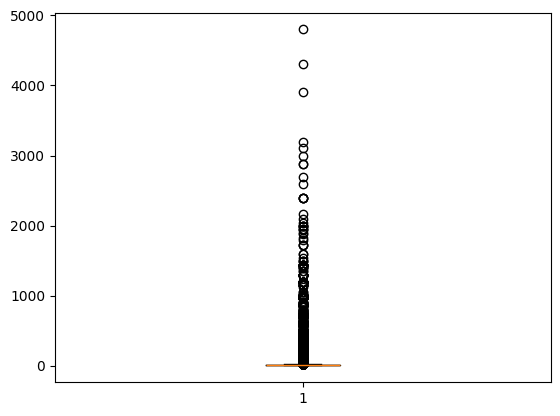

In [25]:
plt.boxplot(df['Quantity'])
plt.show()

Все еще видно большое количество выбросов

In [26]:
p99 = np.percentile(df['Quantity'], 99)   # Считаем 99-ю процентиль
p99

np.float64(120.0)

Такие показтели легко посчитать ошибками и удалить их, однако учитывая специфику площадки, у которой весомая часть покупателей оптовики - такие данные вполне нормальны.

# 3. Анализ

После очистки данных можно приступить к анализу данных 

## Продажи

### Общие показатели

#### Выручка

Добавим колонку, отображающую цену товара в заказе

In [27]:
df['Price'] = df['UnitPrice'] * df['Quantity']

Рассчитаем суммарную выручку за весь имеющийся период

In [28]:
print(f"Общая выручка за период с {df['InvoiceDate'].min().date()} по {df['InvoiceDate'].max().date()} составила £{df['Price'].sum():,}")

Общая выручка за период с 2010-12-01 по 2011-12-09 составила £8,371,563.164000001


#### Заказы

Посчитаем количество уникальных заказов 

In [29]:
print(f'Всего было совершено {df['InvoiceNo'].nunique():,} заказов за указанный период')

Всего было совершено 18,363 заказов за указанный период


#### Количество единиц товара

Посмотрим сколько единиц товара было продано

In [30]:
print(f'Всего было продано {df['Quantity'].sum():,} единиц товаров за указанный период')

Всего было продано 4,901,092 единиц товаров за указанный период


#### Уникальные товары

Коды товаров начинаются с чисел и могут содержать буквенные значения.
Посчитаем количество уникальных товаров, проданных за период наблюдений

In [31]:
print(f'За указзынй период были проданы товары из {df[df['StockCode'].str.contains(r'^(\d+)(\D)?')]\
                                                        ['StockCode'].nunique()} товаров')

C:\Users\Даниил\AppData\Local\Temp\ipykernel_6972\1033776969.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(f'За указзынй период были проданы товары из {df[df['StockCode'].str.contains(r'^(\d+)(\D)?')]\


За указзынй период были проданы товары из 3645 товаров


Далее займемся расчетом самых популярных товаров на площадке.
Товары, имеющие одинаковый код могут иметь несколько описаний, поэтому оставим первое встреченное значение.

In [32]:
# Группировка с сохранением одной Description
stock_qty = df.groupby('StockCode', as_index=False).agg(
    Total_Quantity=('Quantity', 'sum'),
    Description=('Description', 'first')  # Берём первое значение
)

Среди всех кодов товаров выберем те, которых начинаются с цифры и возможно, содержат букву в коде

In [33]:
stock_qty = stock_qty[stock_qty['StockCode'].str.contains(r'^(\d+)(\D)?')]

C:\Users\Даниил\AppData\Local\Temp\ipykernel_6972\1114524019.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  stock_qty = stock_qty[stock_qty['StockCode'].str.contains(r'^(\d+)(\D)?')]


Отсортировав категории по количеству проданных товаров, выберем первые 10 из них

In [34]:
top10 = stock_qty.sort_values('Total_Quantity', ascending = False).head(10)

Используем библиотеку seaborn для создания простой и различимой визуализации

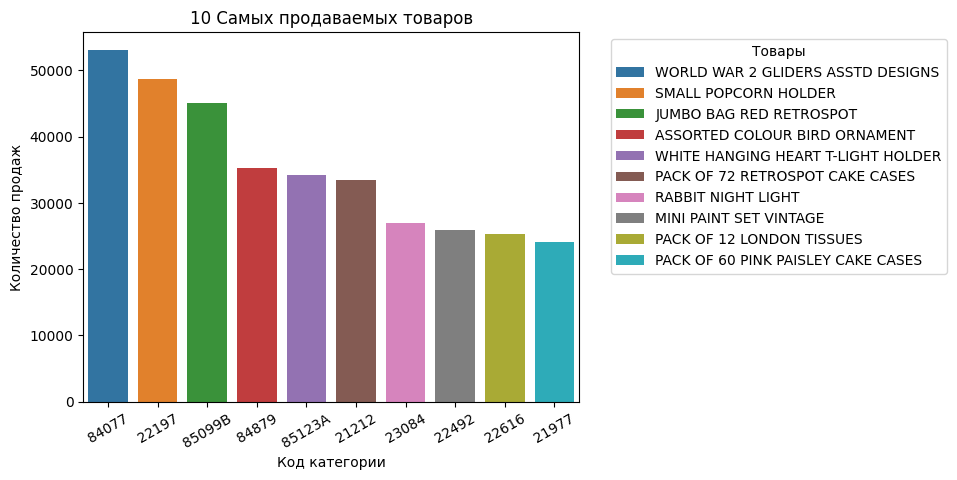

In [35]:
import seaborn as sns
sns.barplot(x = top10['StockCode'],y = top10['Total_Quantity'], hue = top10['Description'])
plt.xticks(rotation = 30)
plt.title('10 Самых продаваемых товаров')
plt.xlabel('Код категории')
plt.ylabel('Количество продаж')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Товары') # расположение легенды

## Клиентские метрики

Посчитаем количество уникальных пользователей

In [36]:
print(f'За указанный период сервисов воспользовалось {df['CustomerID'].nunique()} уникальных пользователей')

За указанный период сервисов воспользовалось 4323 уникальных пользователей


Рассчитаем сколько товаров, в среднем приходится на одного пользователя

In [37]:
client_orders = df.groupby('CustomerID')['Quantity'].sum()
print(f'В среднем на одного клиента приходится {client_orders.mean()} заказанных товаров')

В среднем на одного клиента приходится 1133.7247281980106 заказанных товаров


Наш датасет сильно смещен, поэтому посмотрим на медианное значение

In [38]:
print(f'Медианное число заказанных товаров на одного клиента равно {client_orders.median()}')

Медианное число заказанных товаров на одного клиента равно 372.0


Посчитаем сколько пользователи в среднем потратили пользователи за год

In [39]:
client_revenue = df.groupby('CustomerID')['Price'].sum()
print(f'В среднем на одного клиента приходится {client_revenue.mean()} выручки')

В среднем на одного клиента приходится 1936.517040018506 выручки


По причине сильного влияния выбросов, рассмотрим медианное значение 

In [40]:
print(f'В среднем на одного клиента приходится {client_revenue.median()} выручки')

В среднем на одного клиента приходится 656.61 выручки


Посчитаем процент пользователей, которые совершили более одного заказа

In [41]:
client_unique = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name = 'Orders')
print(f'{round((len(client_unique[client_unique['Orders']>1])/ len(client_unique)),4) * 100}% пользователей воспользовались сервисом более одного раза')

65.53% пользователей воспользовались сервисом более одного раза


## Отказы

Посчитаем процент отказов по следующей формуле 
$\frac{КнВТ}{КВТ}$, где

КнВТ - Количество невозвращенных товаров, то есть тех, которые остались у заказчика

КВТ - Количество возвращенных товаров

In [67]:
order_num = df['Quantity'].sum()
return_num = returns['Quantity'].abs().sum()
return_rate = round(((return_num/order_num)*100), 2)
print(f'Процент отказов по всем товарам за год составляет {return_rate}%')

Процент отказов по всем товарам за год составляет 2.4%


##  По странам

#### Количество заказов

Посмотрим, в какое количество стран поставляются продукты

In [65]:
print('Количество стран, в которые были поставлены продукты: ' + str(df['Country'].nunique()))

Количество стран, в которые были поставлены продукты: 36


Посмотрим на распределение заказов по странам

In [44]:
country_invoice = df.groupby(['Country'])['InvoiceNo'].nunique()\
                        .reset_index(name = 'Count')\
                        .sort_values('Count')

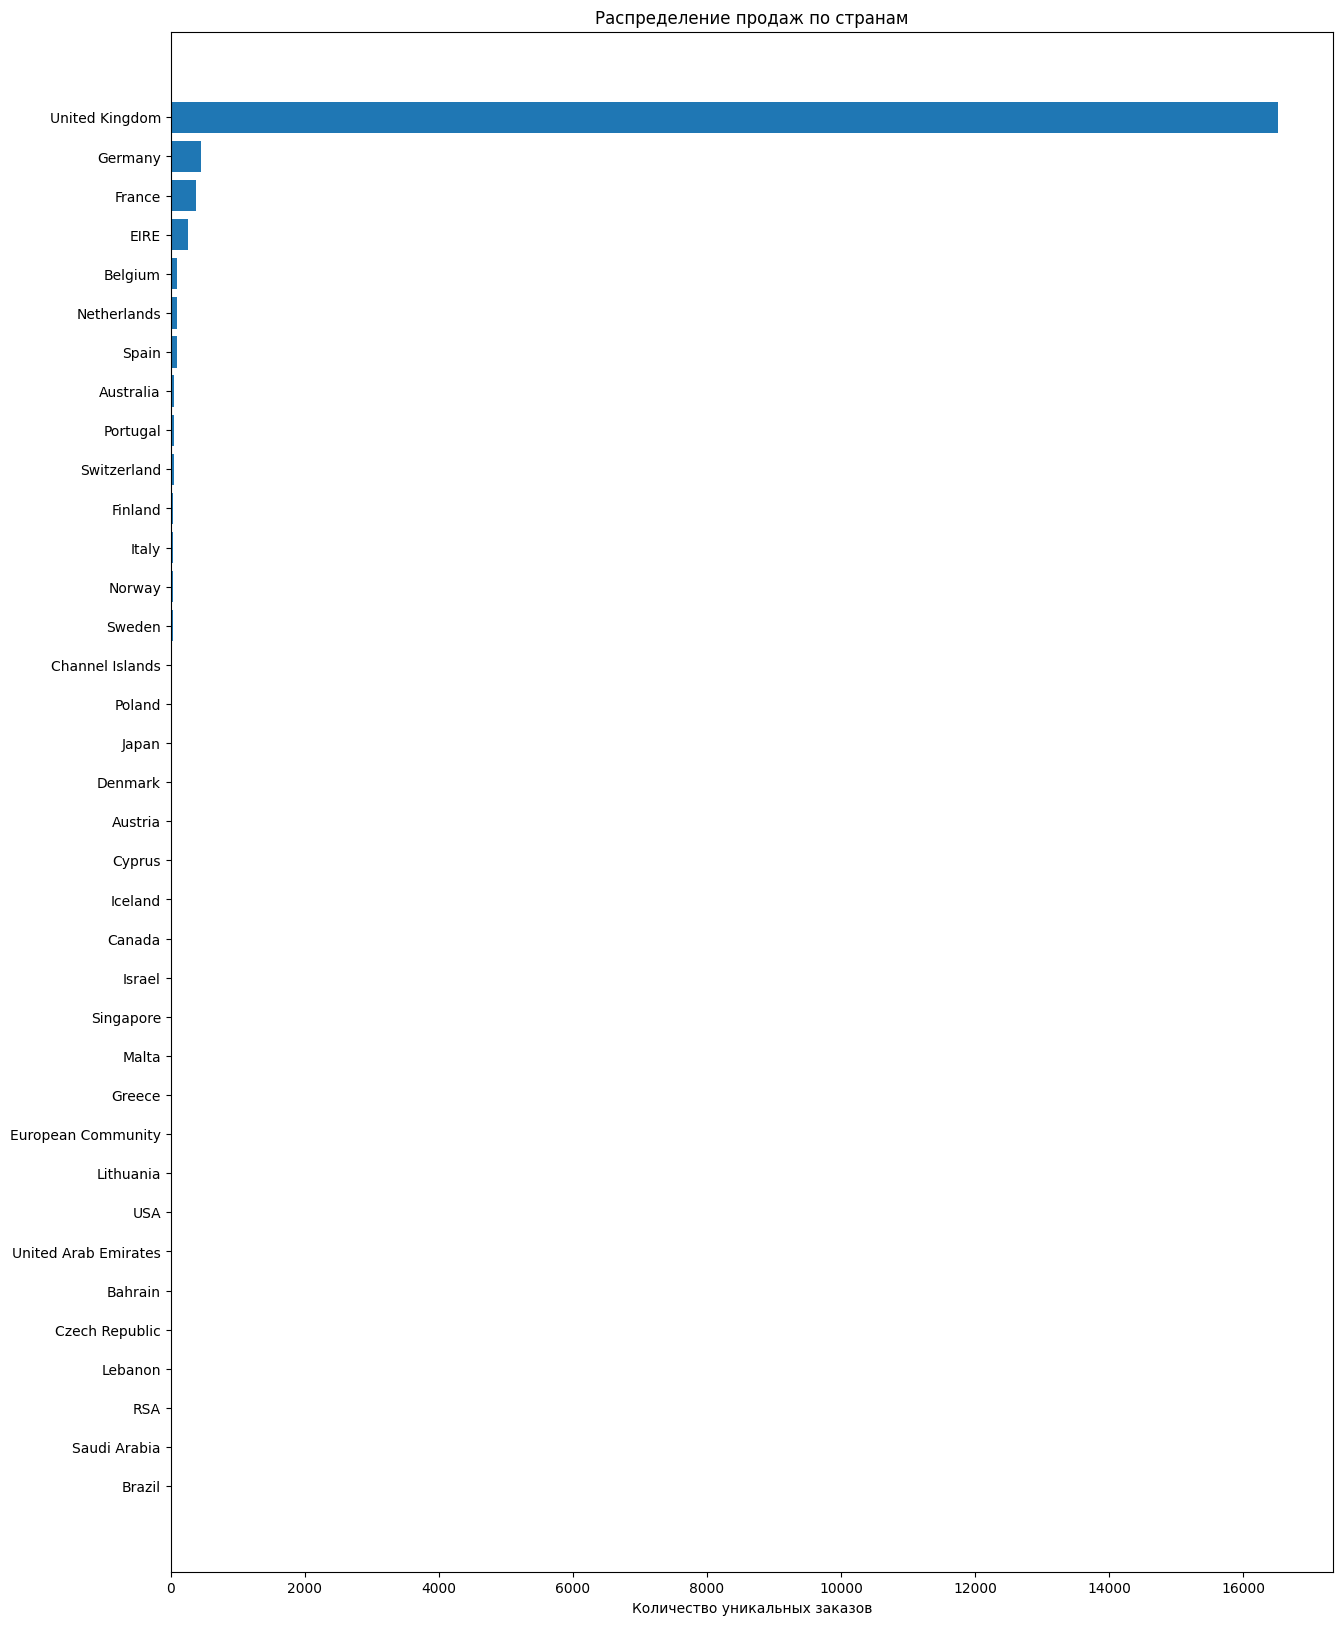

In [45]:
fig, ax = plt.subplots(figsize = (15,20))

ax.barh('Country', 'Count', data = country_invoice, align='center')

ax.set_xlabel('Количество уникальных заказов')
ax.set_title('Распределение продаж по странам')
plt.show()

Ввиду явной доминации заказов из Великобритании, рассмотрим график, не включающий заказы из этой страны, что бы лучше понять масштаб

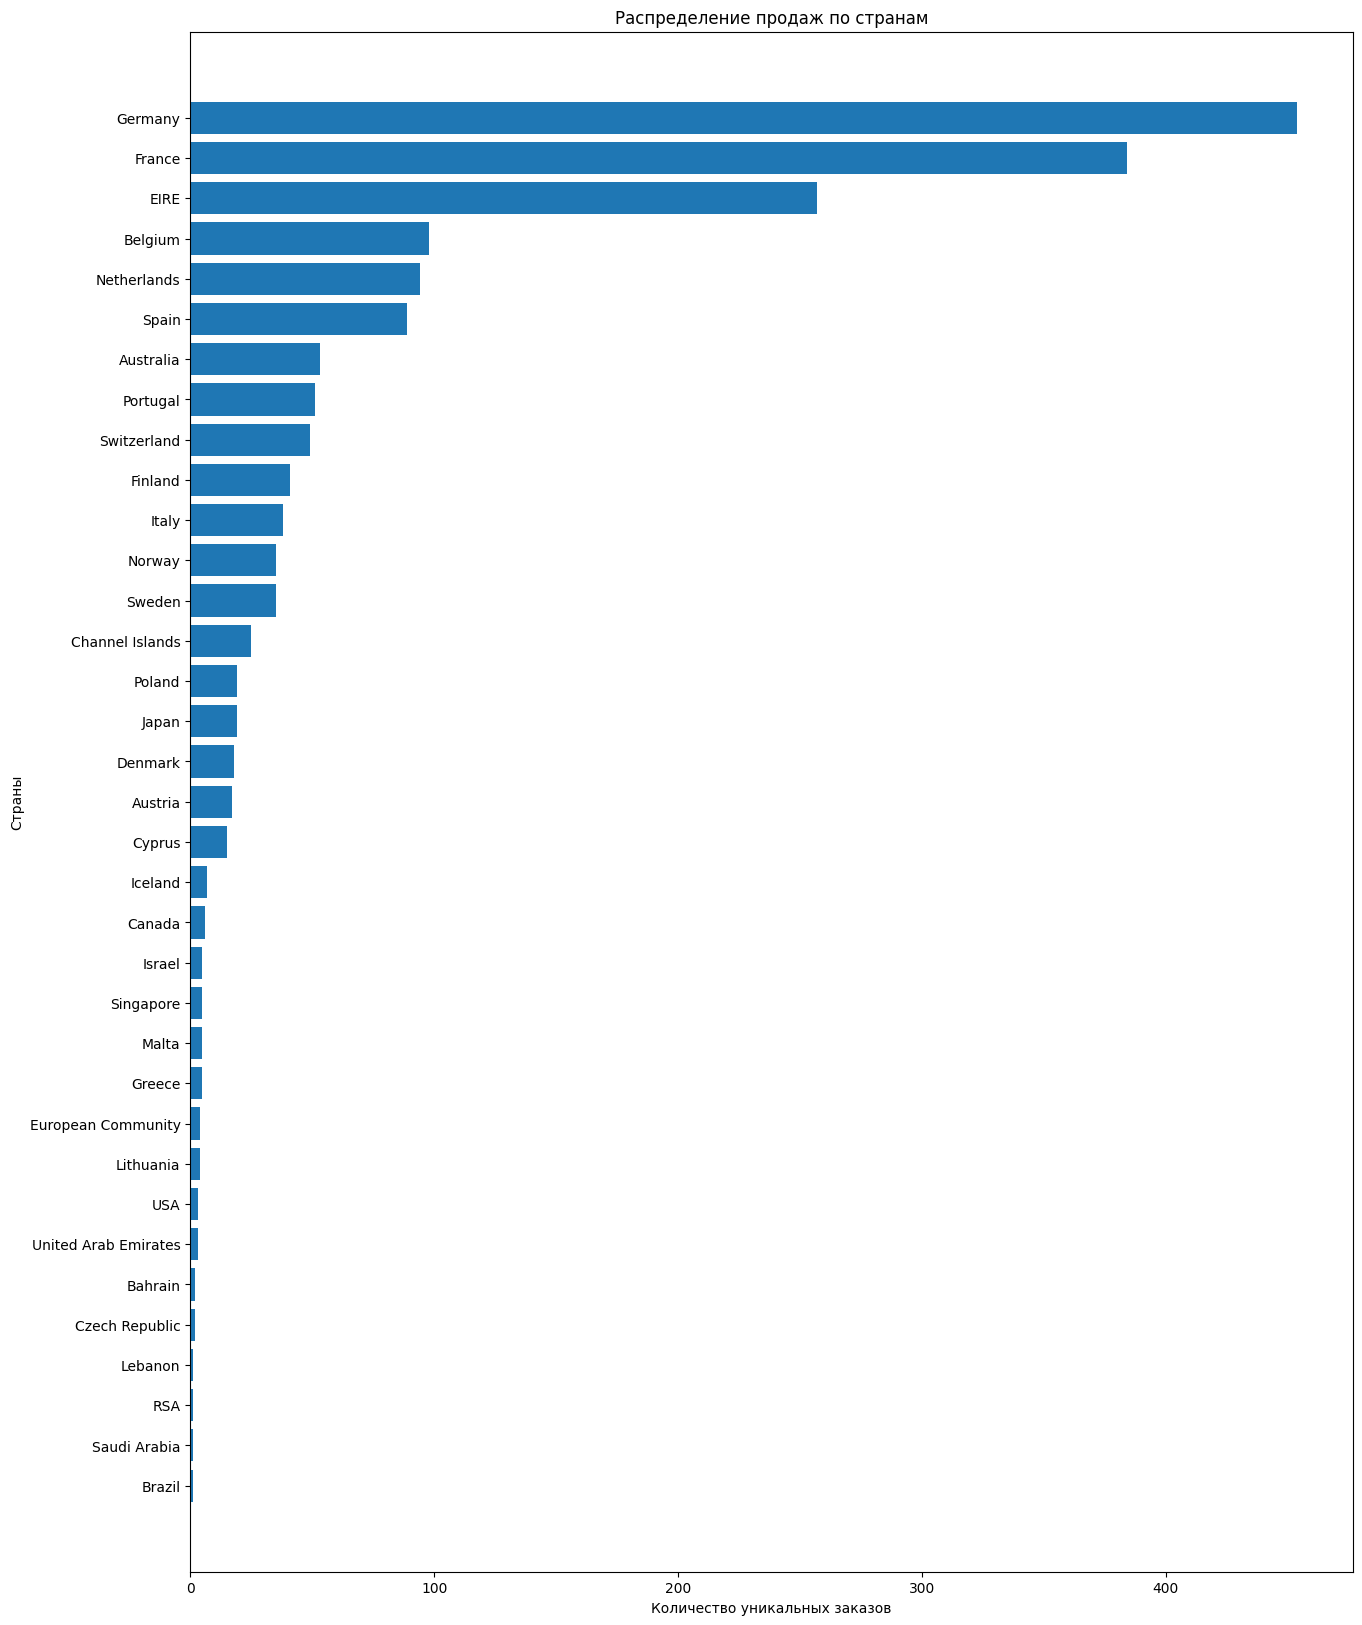

In [46]:
fig, ax = plt.subplots(figsize = (15,20))

ax.barh('Country', 'Count', data = country_invoice[country_invoice['Country']!='United Kingdom'], align='center')

plt.xlabel('Количество уникальных заказов')
plt.title('Распределение продаж по странам')
plt.ylabel('Страны')
plt.show()

Большая часть заказов приходится на близлежащие страны, а также страны западной Европы

#### Общая выручка 

In [47]:
country_total = df.groupby('Country')['Price'].sum().reset_index().sort_values('Price')

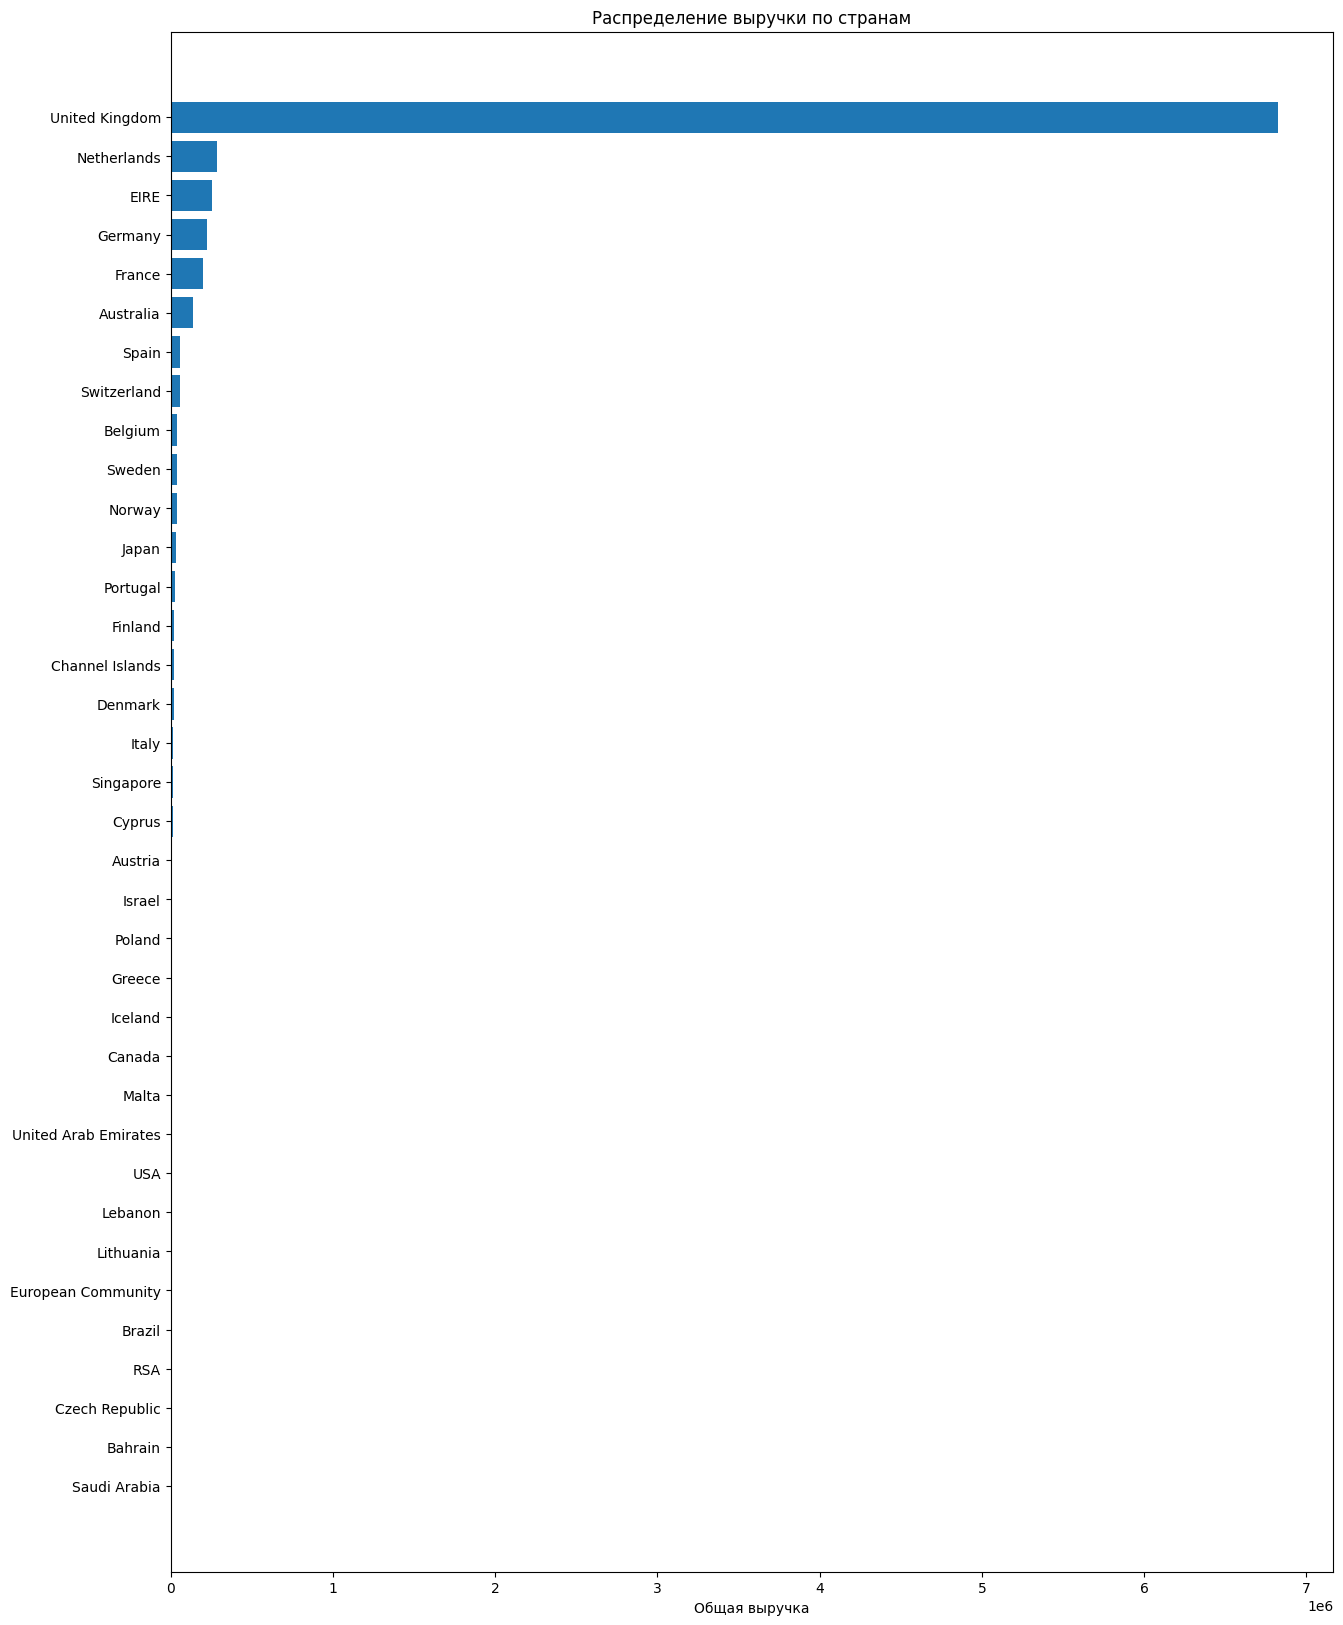

In [48]:
fig, ax = plt.subplots(figsize = (15,20))

ax.barh('Country', 'Price', data = country_total, align='center')

ax.set_xlabel('Общая выручка')
ax.set_title('Распределение выручки по странам')
plt.show()

## Средние показатели

### Средний чек

Вычислим среднюю стоимость товаров в одном заказе

In [49]:
invoice_totals = df.groupby('InvoiceNo')['Price'].sum().reset_index()
# Вычисляем средний чек
medium_check = invoice_totals['Price'].mean()
median_check = invoice_totals['Price'].median()

print(f'Средний чек: {medium_check}')
print(f'Медианный чек: {median_check}')

Средний чек: 455.89300027228666
Медианный чек: 299.48


Судя по разнице между средним и медианным чеком, график распредения цен заказов сильно смещен вправо.
Убедимся в этом

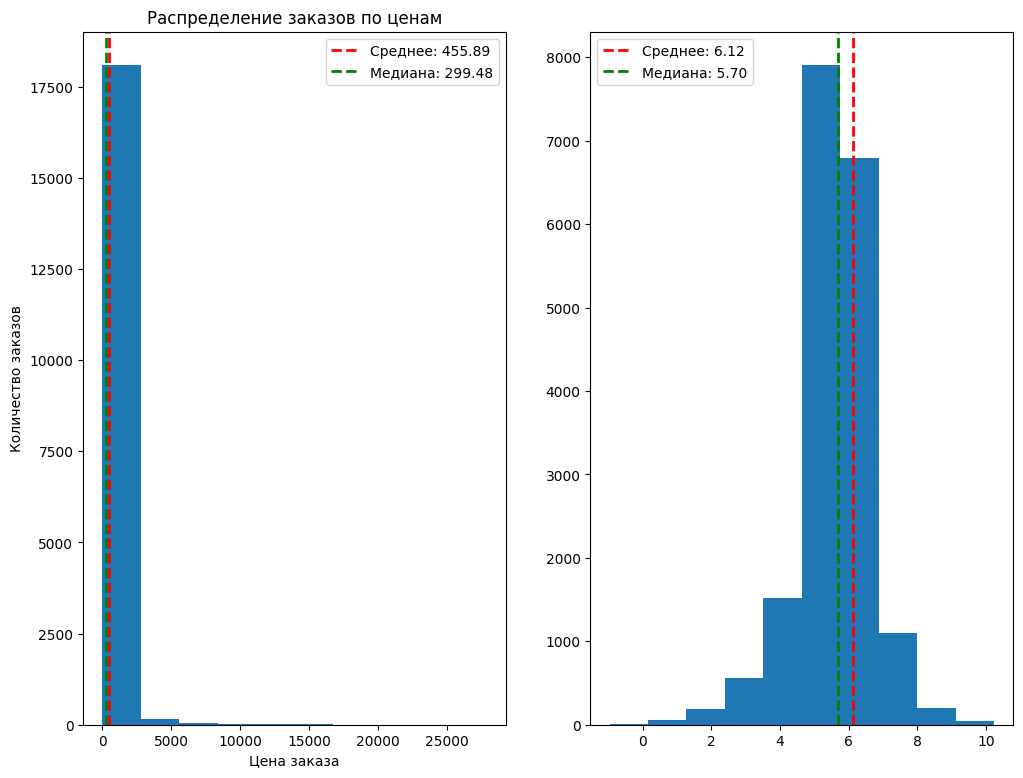

In [50]:
#Создание фигуры
plt.figure(figsize=(12,9))
#Первая гистограмма
#Исходные данные
#Слева
plt.subplot(1,2,1)
plt.hist(invoice_totals['Price'])

plt.xlabel('Цена заказа')
plt.ylabel('Количество заказов')
plt.title('Распределение заказов по ценам')

plt.axvline(medium_check, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {medium_check:.2f}')    #Среднее
plt.axvline(median_check, color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {median_check:.2f}')    #Медиана

plt.legend()

#Вторая гистограмма
#Прологорифмированные данные
#Справа
invoice_totals_log = np.log(invoice_totals[invoice_totals['Price']!=0]['Price'])    #Логарифмирование

plt.subplot(1,2,2)
plt.hist(invoice_totals_log)

plt.axvline(np.log(medium_check), color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {np.log(medium_check):.2f}')   #log(Среднее)
plt.axvline(np.log(median_check), color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {np.log(median_check):.2f}')   #log(Медиана)
plt.legend()

plt.show()

После логарифмирования исходных данных было получено распределение, близкое к нормальному.
Это в лишний раз подчеркивает влияние выбросов на средний чек.

### Среднее количество товаров в заказе

In [51]:
order_quantities  = df.groupby('InvoiceNo')['Quantity'].sum().reset_index(name='Total')
average_quantity_per_order = order_quantities['Total'].mean()
median_quantity_per_order = order_quantities['Total'].median()
print(f'Среднее количество товаров в заказе составляет {int(round(average_quantity_per_order, 0))}')
print(f'Медианное количество товаров в заказе составляет {int(round(median_quantity_per_order, 0))}')

Среднее количество товаров в заказе составляет 267
Медианное количество товаров в заказе составляет 153


Достаточно большая разница, можно предположить, что среднее также подвержено сильному влиянию выбросов

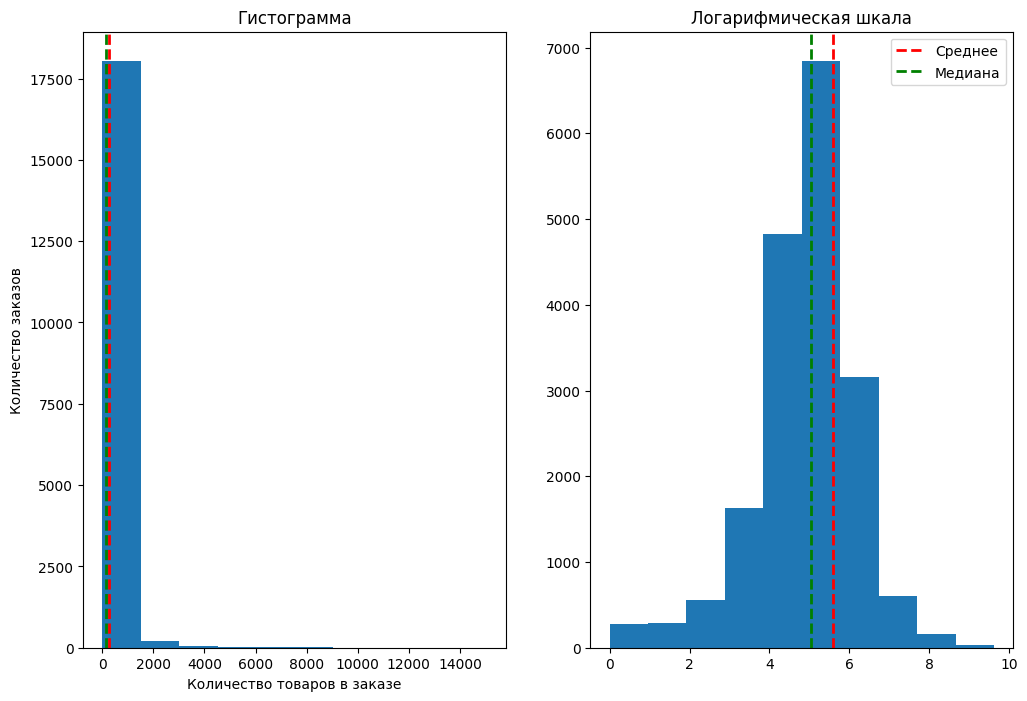

In [52]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.hist(order_quantities['Total'])
plt.xlabel('Количество товаров в заказе')
plt.axvline(average_quantity_per_order, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {average_quantity_per_order:.2f}')
plt.axvline(median_quantity_per_order, color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {median_quantity_per_order:.2f}')
plt.ylabel('Количество заказов')
plt.title('Гистограмма')

plt.subplot(1,2,2)
plt.title('Логарифмическая шкала')
plt.axvline(np.log(average_quantity_per_order), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(np.log(median_quantity_per_order), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.hist(np.log(order_quantities['Total']))
plt.legend()
plt.show()

Как видно из сравнения двух гистограмм, первоначальные данные крайне сильно подвержены влиянию выбросов, тем не менее распределение близко к нормальному

### Средняя цена товара

Для рассчета средней цены товара разделим общую выручку на количество заказнных товаров

In [53]:
print(f'Средняя цена одного товара состовляет £{round(df['Price'].sum() / df['Quantity'].sum(), 2)}')

Средняя цена одного товара состовляет £1.71


###  По странам

#### Чек

##### Средний

Посмотрим, покупатели из каких стран, в среднем заказывают на большую сумму.

In [54]:
medium_check_per_country = df.groupby('Country')['Price'].mean().reset_index(name = 'Medium')\
                            .sort_values('Medium')

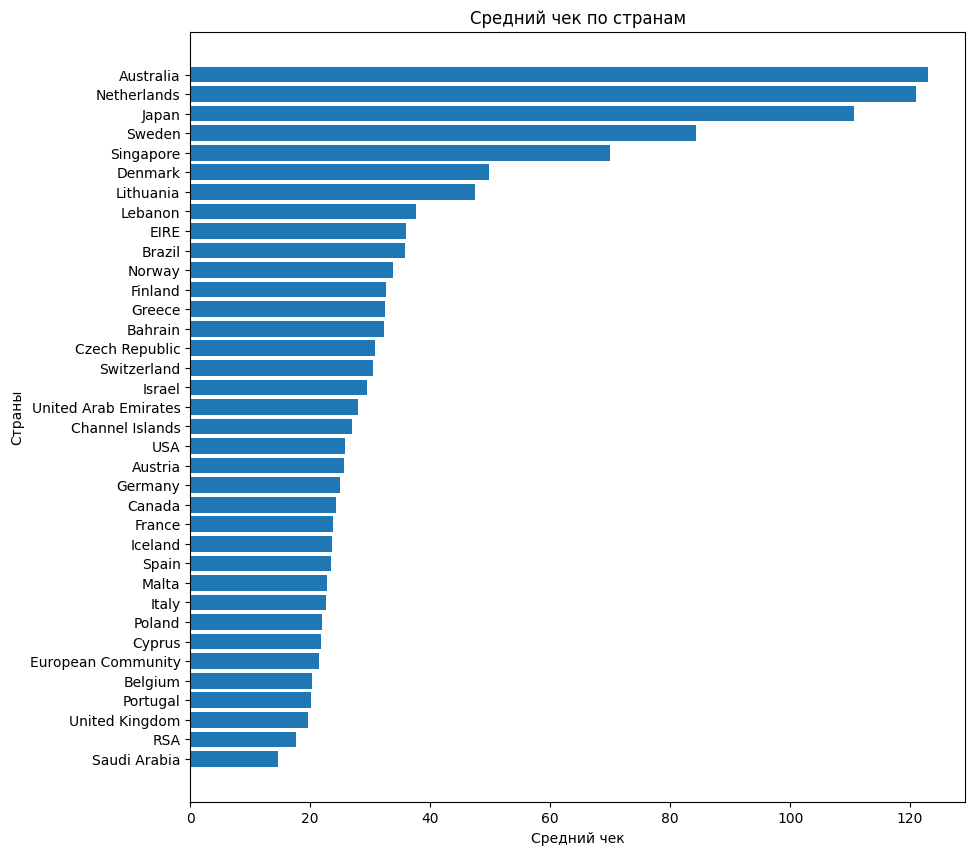

In [55]:
fig, ax = plt.subplots(figsize = (10,10))

ax.barh('Country', 'Medium', data = medium_check_per_country, align='center')

plt.xlabel('Средний чек')
plt.title('Средний чек по странам')
plt.ylabel('Страны')
plt.show()

##### Медианный

In [56]:
median_check_per_country = df.groupby('Country')['Price'].median().reset_index(name = 'Median')\
                            .sort_values('Median')

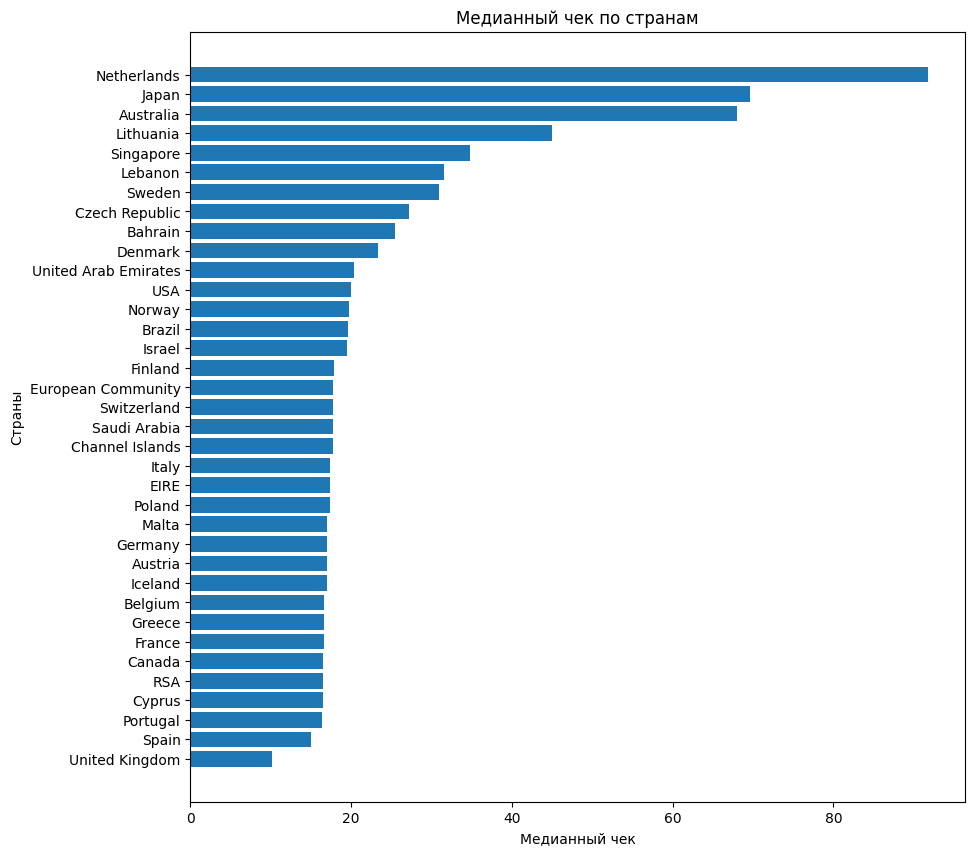

In [57]:
fig, ax = plt.subplots(figsize = (10,10))

ax.barh('Country', 'Median', data = median_check_per_country, align='center')

plt.xlabel('Медианный чек')
plt.title('Медианный чек по странам')
plt.ylabel('Страны')
plt.show()

#### Количество товаров в заказе

##### Среднее

In [58]:
# Суммируем количество товаров по каждой стране и заказу
invoice_count_per_country = df.groupby(['Country', 'InvoiceNo'])['Quantity'].sum()\
                              .reset_index(name='Count')

# Вычисляем среднее количество товаров в заказе по каждой стране
average_items_per_country = invoice_count_per_country.groupby('Country')['Count'].mean()\
                                                     .reset_index(name='Average')\
                                                     .sort_values('Average')

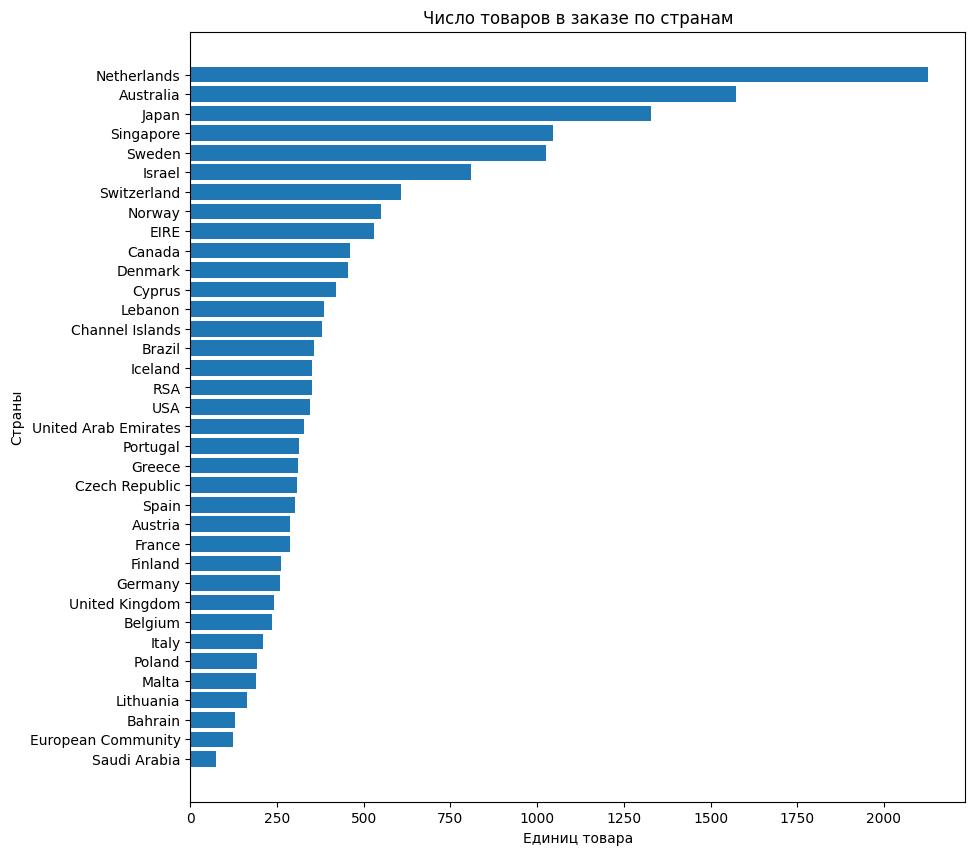

In [59]:
fig, ax = plt.subplots(figsize = (10,10))

ax.barh('Country', 'Average', data = average_items_per_country, align='center')

plt.xlabel('Единиц товара')
plt.title('Число товаров в заказе по странам')
plt.ylabel('Страны')
plt.show()

##### Медианное

In [60]:
# Вычисляем среднее количество товаров в заказе по каждой стране
median_items_per_country = invoice_count_per_country.groupby('Country')['Count'].median()\
                                                     .reset_index(name='Median')\
                                                     .sort_values('Median')

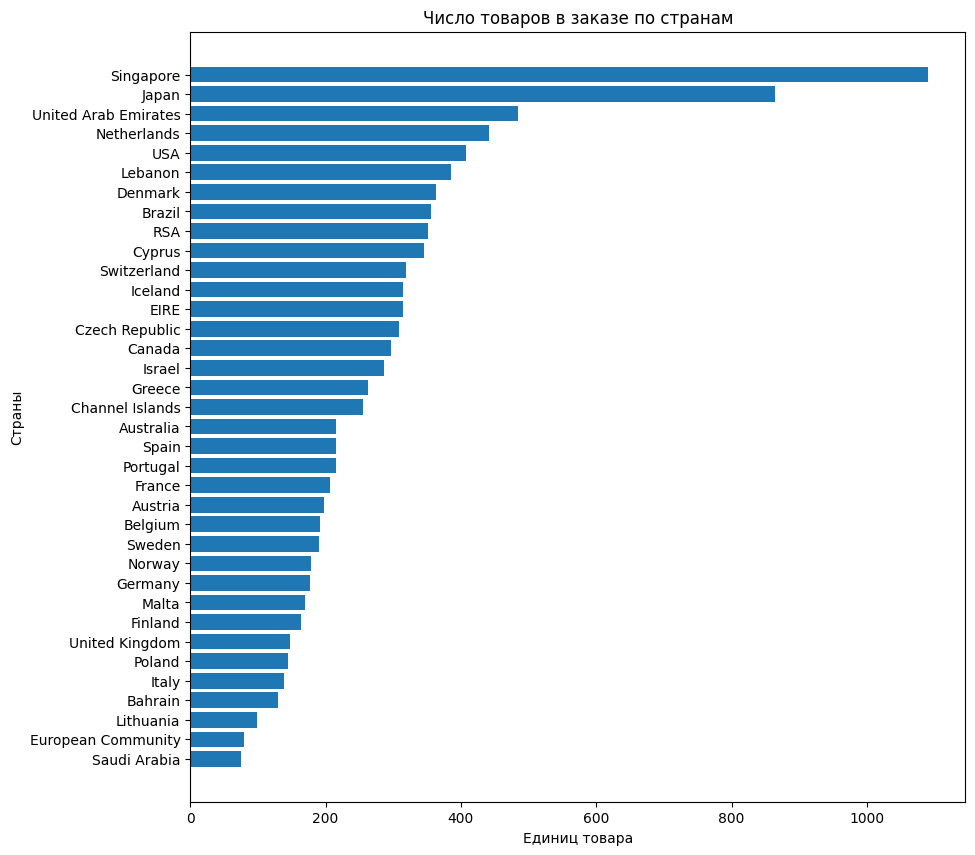

In [61]:
fig, ax = plt.subplots(figsize = (10,10))

ax.barh('Country', 'Median', data = median_items_per_country, align='center')

plt.xlabel('Единиц товара')
plt.title('Число товаров в заказе по странам')
plt.ylabel('Страны')
plt.show()

## Показатели по месяцам

Для того, чтобы посчитать некоторые показатели по месяцам, нужно немного изменить наш набор данных

Добавим в таблицу колонку с указанием месяца заказа

In [62]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

### Выручка

Далее рассмотрим на изменение выручки от месяца к месяцу 

Не станем включать в рассмотрение декабрь 2011 года, так как в этом месяце данные имеются только о 9 днях

In [69]:
revenue_by_month = df[df['YearMonth']!='2011-12']\
                     .groupby('YearMonth')['Price'].sum()\
                     .reset_index(name = 'Revenue')

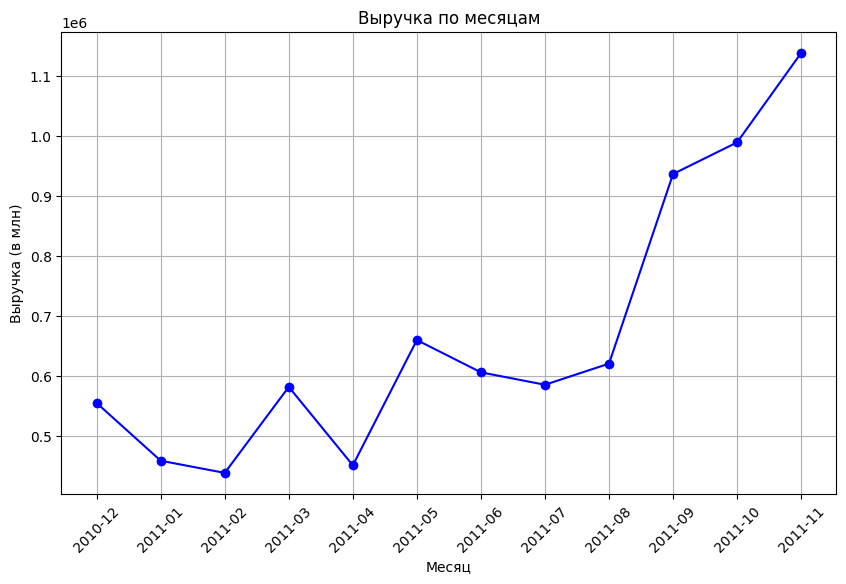

In [70]:
revenue_by_month['YearMonth'] = revenue_by_month['YearMonth'].astype(str)  # Преобразуем для оси X

plt.figure(figsize=(10, 6))
plt.plot(revenue_by_month['YearMonth'], revenue_by_month['Revenue'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel('Месяц')
plt.ylabel('Выручка (в млн)')
plt.title('Выручка по месяцам')
plt.grid(True)
plt.show()

Выручка за месяц в конце года выросла более чем в 2 раза, в сравнении с началом года 

### Количество заказов

Схожий график приведем и для числа заказов

In [71]:
orders_by_month = df[df['YearMonth']!='2011-12']\
                     .groupby('YearMonth')['InvoiceNo'].nunique()\
                     .reset_index(name = 'Count')

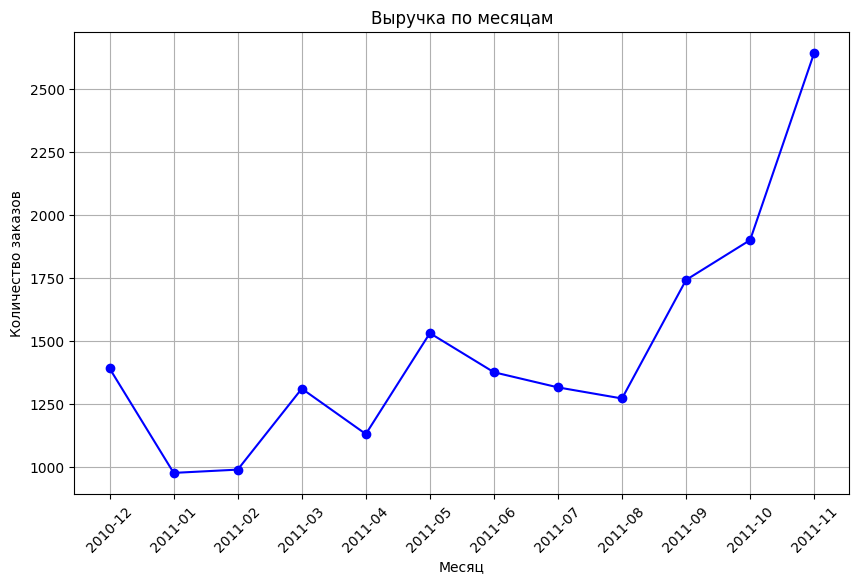

In [72]:
orders_by_month['YearMonth'] = orders_by_month['YearMonth'].astype(str)  # Преобразуем для оси X

plt.figure(figsize=(10, 6))
plt.plot(orders_by_month['YearMonth'], orders_by_month['Count'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Выручка по месяцам')
plt.grid(True)
plt.show()

Два приведенных графика вполне ожидаемо коррелируют между собой, рост числа заказов влечет рост выручки.
Единственным отклонением стал февраль 2011, когда небольшое увеличение числа заказов повлекло уменьшение выручки

Для наглядной демонстрации зависимости между двумя графиками рассчитаем коэффицент корреляции.

In [73]:
monthly_stats = pd.merge(revenue_by_month, orders_by_month, on='YearMonth')

# Считаем корреляцию Пирсона между выручкой и количеством заказов
correlation = monthly_stats['Revenue'].corr(monthly_stats['Count'])
correlation

np.float64(0.9517706482572131)

Близость данного показателя к единице показывает сильную зависимость между двумя показателями

# 4. Выводы

1) По результатам анализа, Великобритания значительно опережает другие страны по объему продаж.
За вычетом Британии львиная доля продаж приходится на соседние страны Западной Европы.

2) Наиболее популярными являются малогабаритные, недорогие товары.

3) Ввиду специфики площадки, большая часть увеличение продаж происходит не в предрождественские дни, а в период до трез месяцев до Рождества. 

4) Средние показатели являются сильно смещенными, ввиду большого влияния выбросов. 
При составлении портрета среднестатистического покупателя лучше ориентироваться на медианные значения, а не средние.

5) Процент возратов составляет всего лишь 2.4%, что является хорошим показателем

**Рекомендации:**
1) Активнее работать в странах, с крупным средним чеком и большим количеством товаров в заказе.
   К таким странам относятся Нидерланды, Япония, Австралия.
   Ввиду удаленности последних двух стран в списке, стоит исследовать процесс доставки в эти страны, что бы упростить логистику
2) Ввиду общих культурной схожести, а также географической близости стран Западной Европы, вероятно, стоит направить большую часть усилий на расширение представительства именно в этих странах